In [1]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
heart=pd.read_csv(r'/Users/admin/Heart Disease/heart.csv') #giving the path we can open our folder from anywhere rather than keeping it in the same folder as heart disease

In [4]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
info=["age","1:male,0:female","chest pain type,1:typical angina,2:atypical angina,3:non-anginal pain,4:asymptomatic","resting blood pressure","serum cholestrol in mg/dl","fasting blood pressure >120 mg/dl","resting electrocardiographic results(values 0,1,2)","maximum heart rate achieved","exercise induced angina","oldpeak=ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels(0-3)colored by fluorosopy","thal:3=normal;6=fixed defect;7=reversable defect"]
for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1:male,0:female
cp:			chest pain type,1:typical angina,2:atypical angina,3:non-anginal pain,4:asymptomatic
trestbps:			resting blood pressure
chol:			serum cholestrol in mg/dl
fbs:			fasting blood pressure >120 mg/dl
restecg:			resting electrocardiographic results(values 0,1,2)
thalach:			maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak=ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels(0-3)colored by fluorosopy
thal:			thal:3=normal;6=fixed defect;7=reversable defect


In [6]:
heart['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
heart.groupby('target').size()

target
0    138
1    165
dtype: int64

In [8]:
heart.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


In [9]:
heart.shape

(303, 14)

In [10]:
heart.size

4242

In [11]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
heart['target'].unique()

array([1, 0])

In [14]:
#visualisation

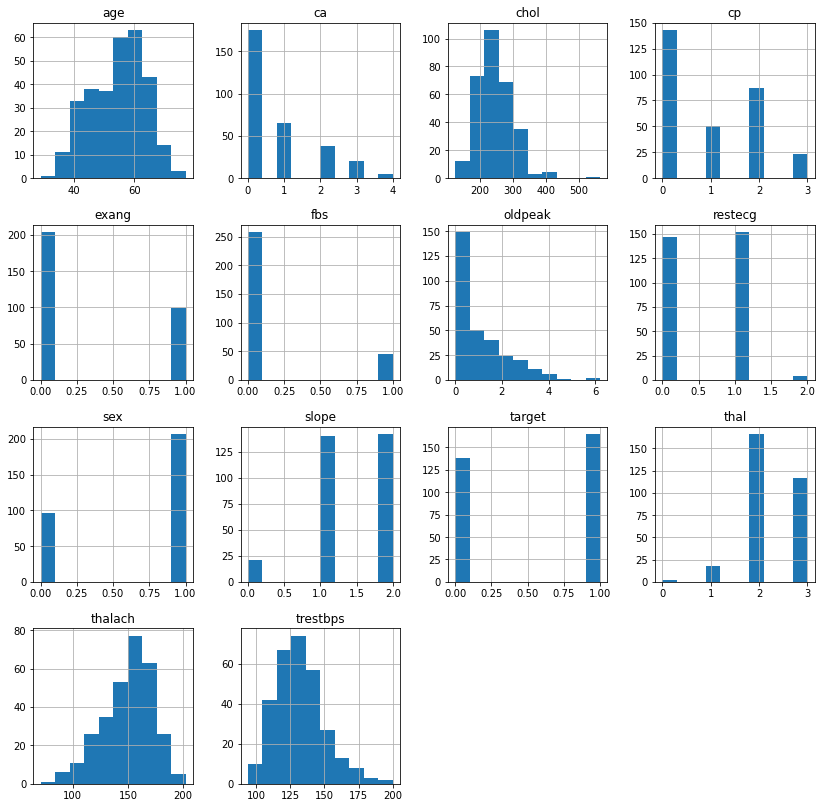

In [15]:
heart.hist(figsize=(14,14))
plt.show()

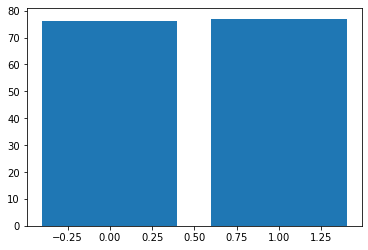

In [16]:
plt.bar(x=heart['sex'],height=heart['age'])
plt.show()

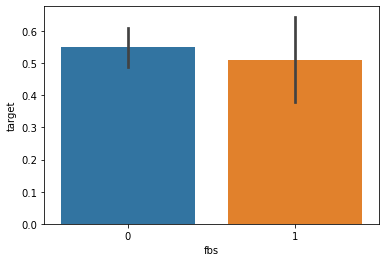

In [17]:
sns.barplot(x="fbs",y="target", data=heart)
plt.show()

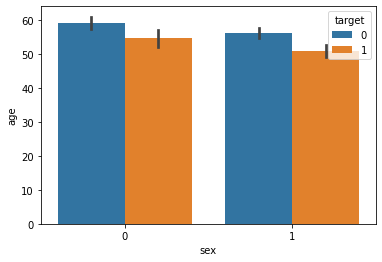

In [18]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



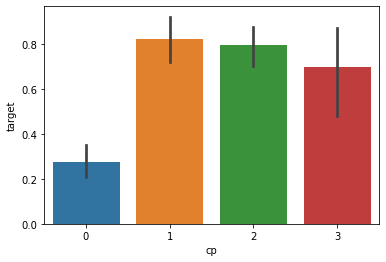

In [19]:
sns.barplot(heart["cp"],heart['target'])

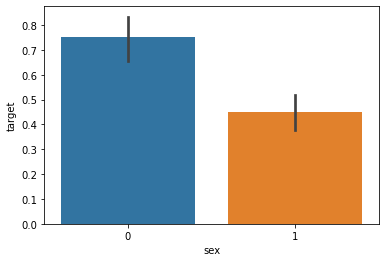

In [20]:
sns.barplot(x=heart["sex"],y=heart['target'])
plt.show()

In [21]:
px.bar(heart,heart['sex'],heart['target'])

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



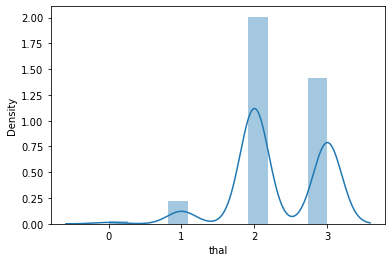

In [22]:
sns.distplot(heart['thal'])

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



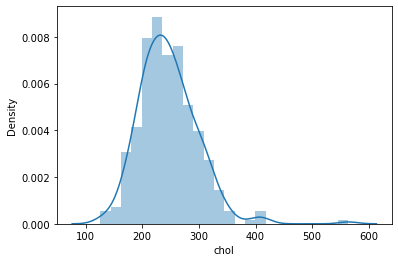

In [23]:
sns.distplot(heart['chol'])

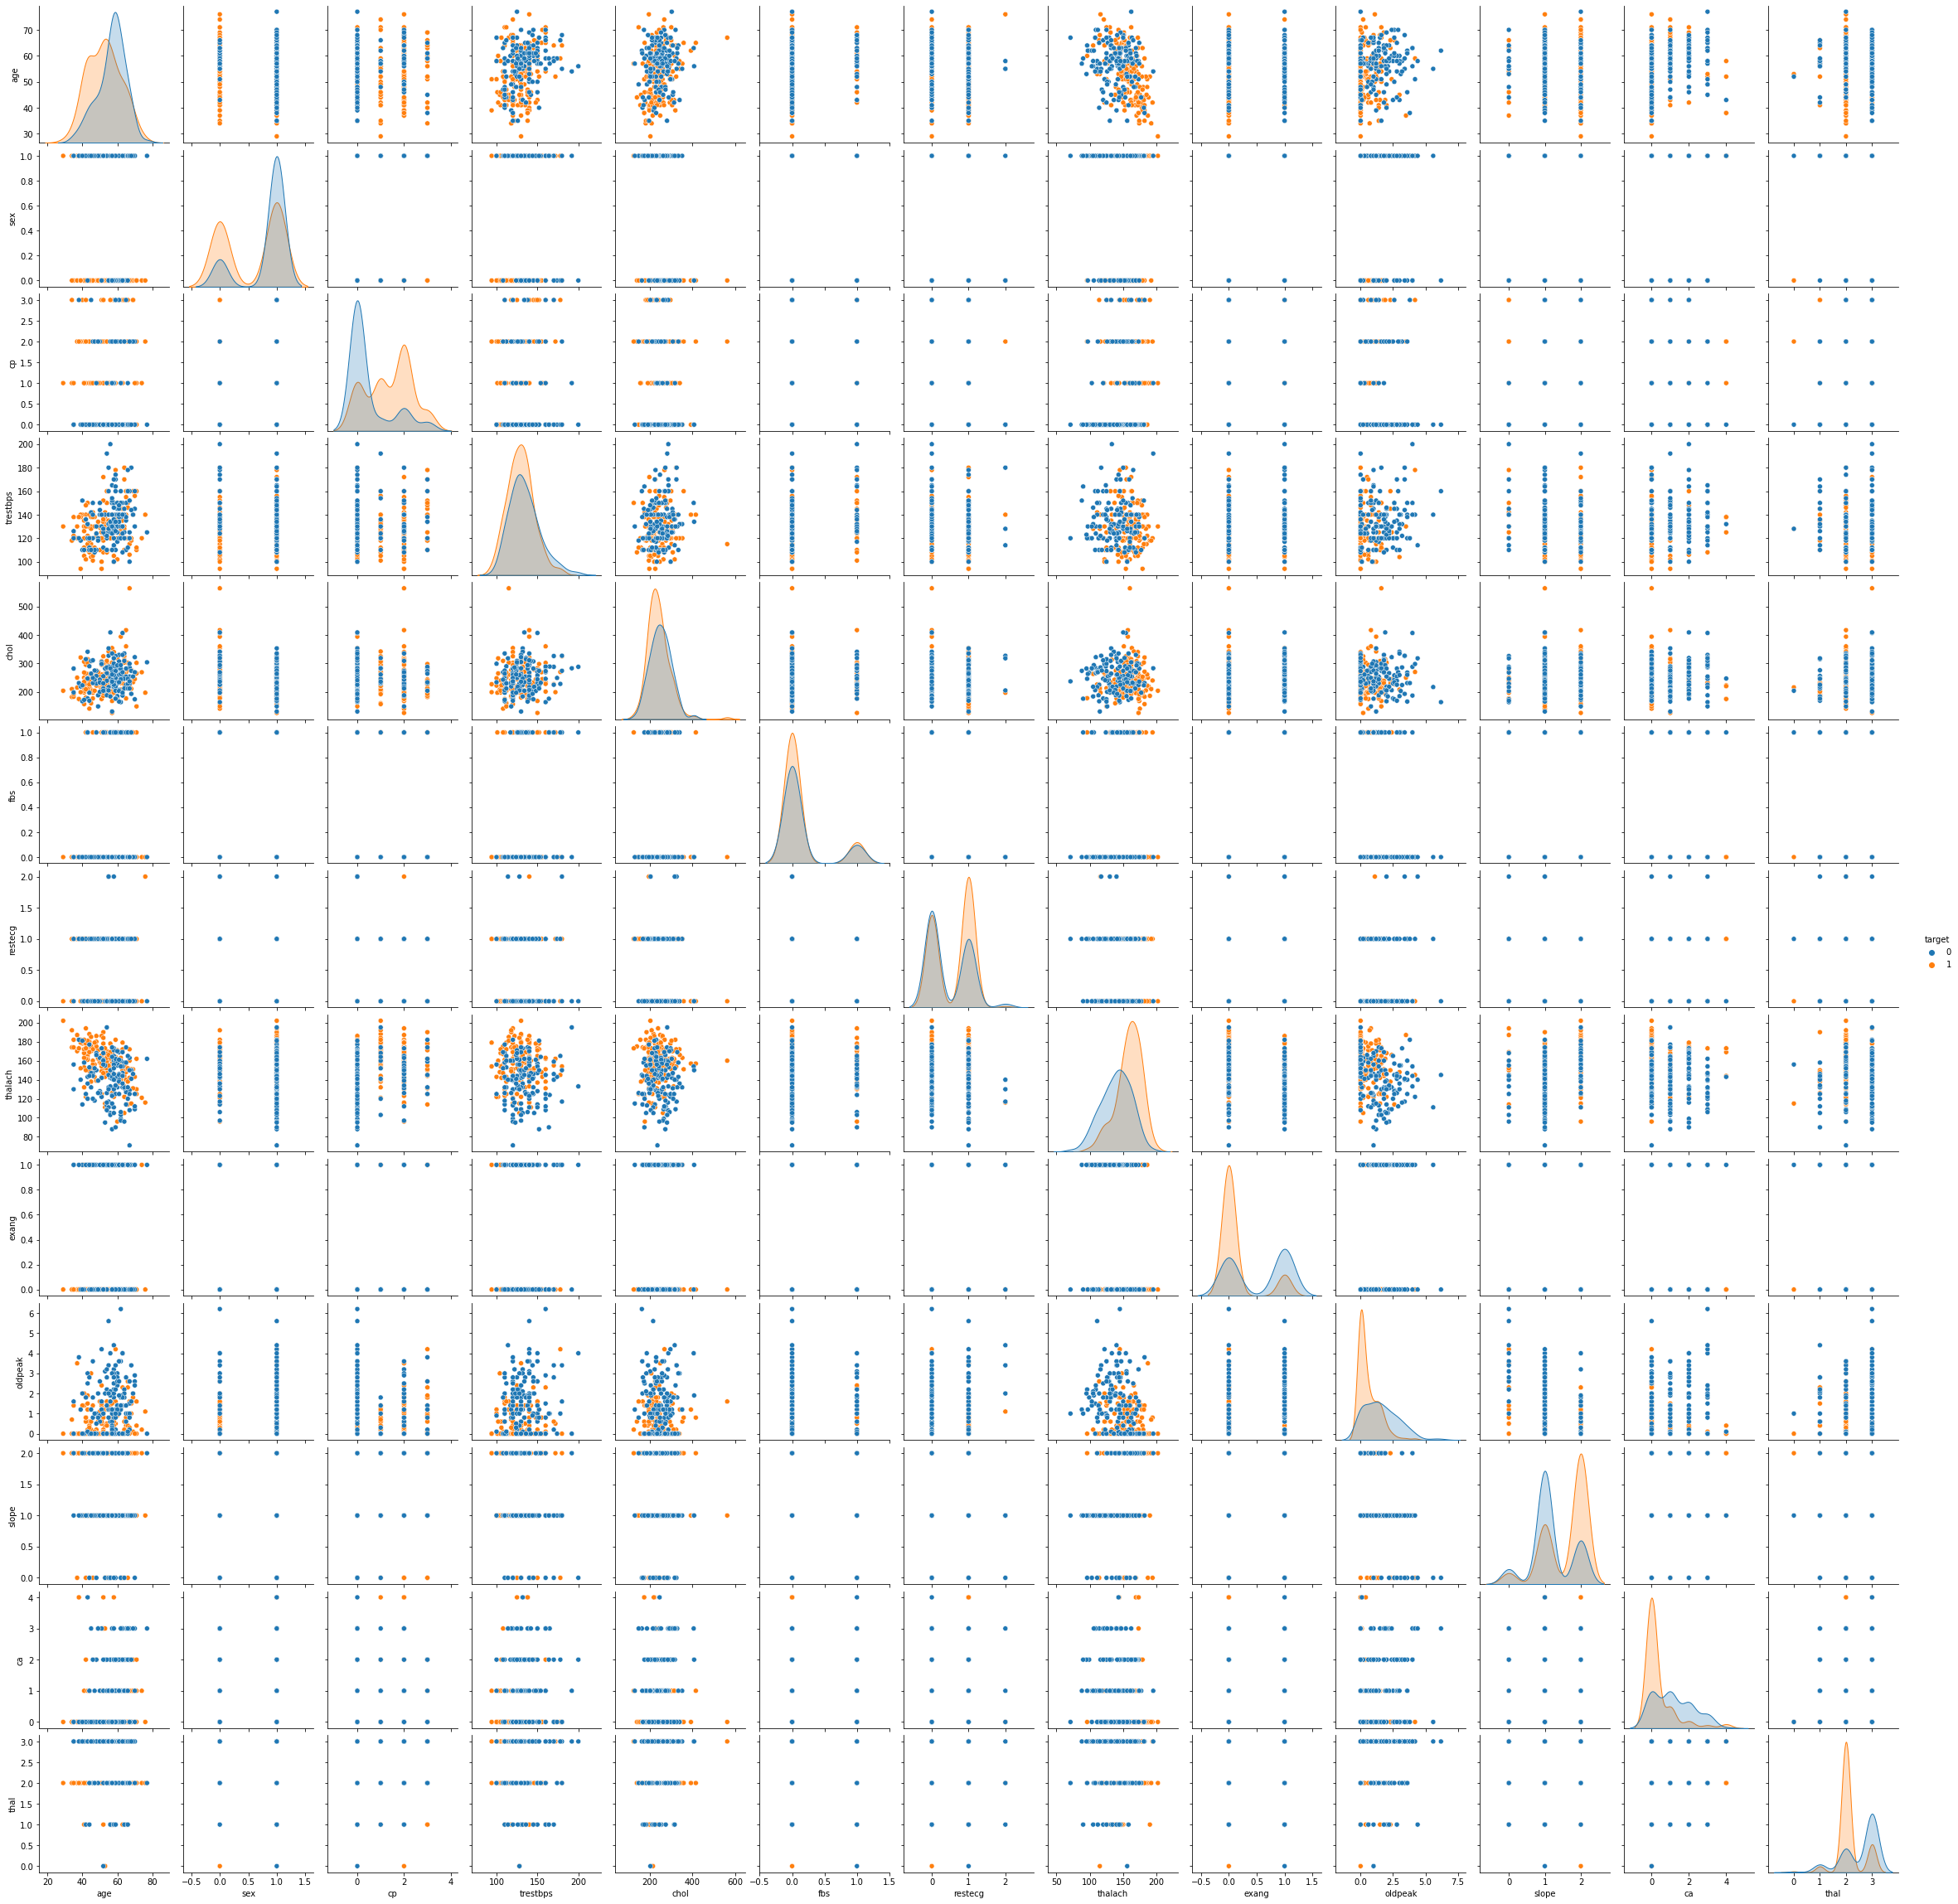

In [24]:
sns.pairplot(heart,hue='target')

In [25]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']


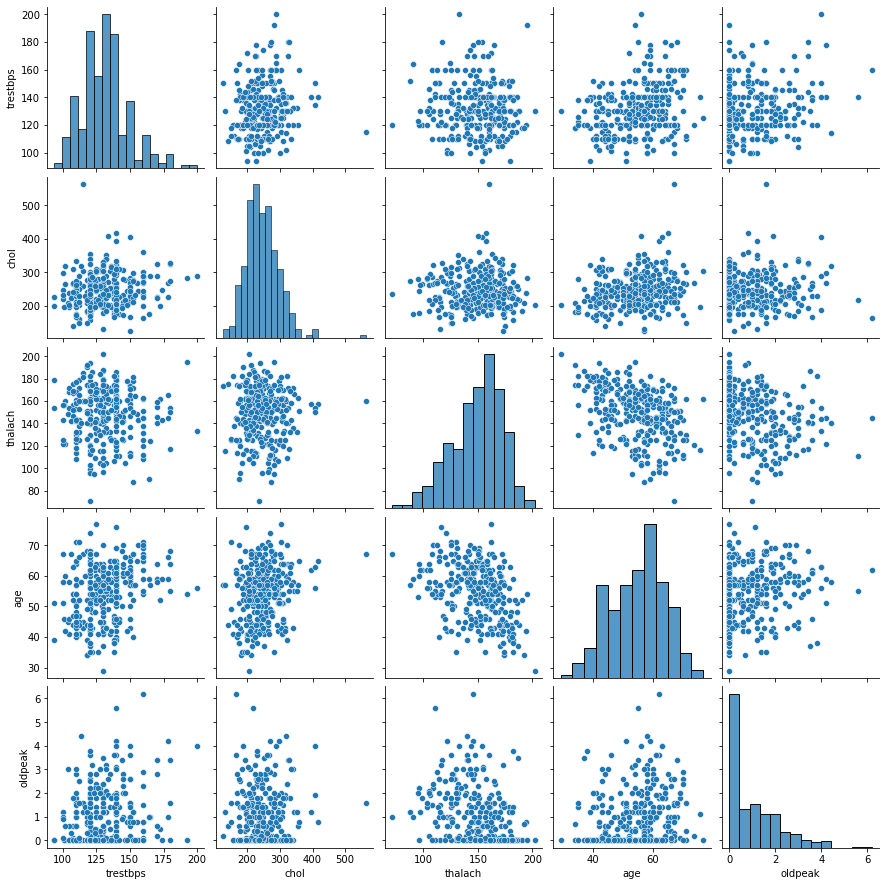

In [26]:
sns.pairplot(heart[numeric_columns])

1    165
0    138
Name: target, dtype: int64


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



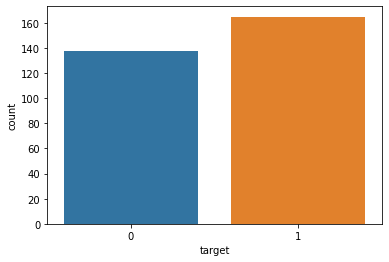

In [27]:
y=heart["target"]
sns.countplot(y)
target_temp=heart.target.value_counts()
print(target_temp)

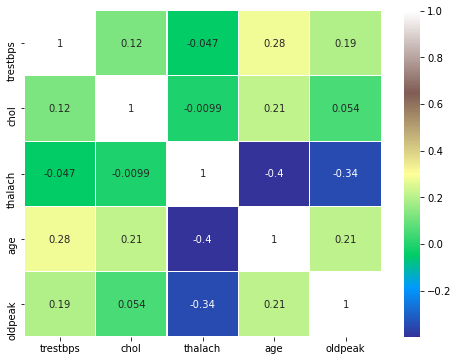

In [28]:
#create a correlation heatmap
sns.heatmap(heart[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/

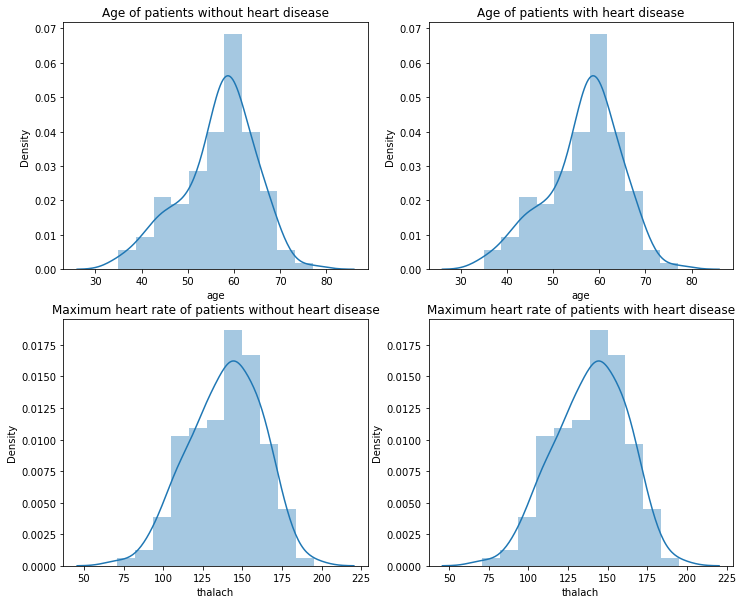

In [29]:
#create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach)
plt.title('Maximum heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==0].thalach)
plt.title('Maximum heart rate of patients with heart disease')
plt.show()

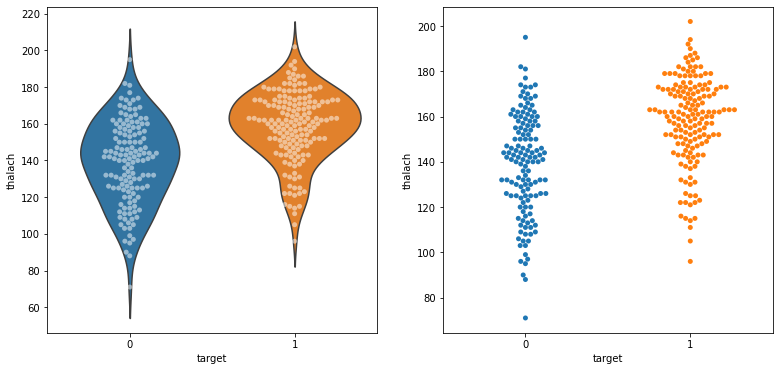

In [31]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="target",y="thalach",data=heart,inner=None)
sns.swarmplot(x="target",y="thalach",data=heart,color='w',alpha=0.5)

plt.subplot(122)
sns.swarmplot(x="target",y="thalach",data=heart)
plt.show()

In [32]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


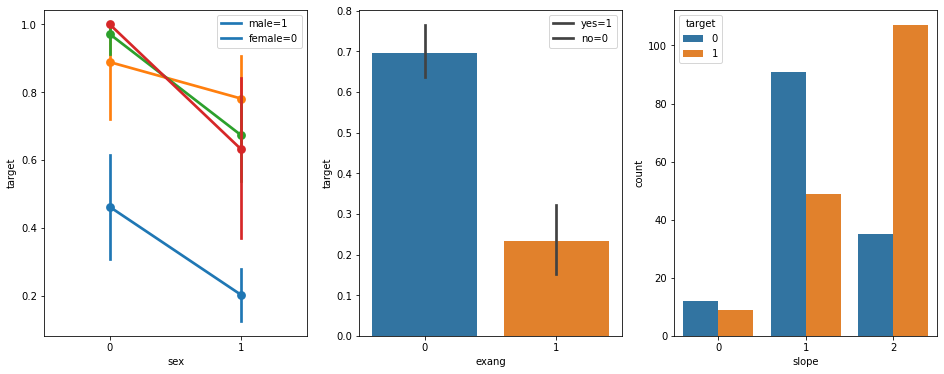

In [34]:
#create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex",y="target",hue="cp",data=heart)
plt.legend(['male=1','female=0'])
plt.subplot(132)
sns.barplot(x="exang",y="target",data=heart)
plt.legend(['yes=1','no=0'])
plt.subplot(133)
sns.countplot(x="slope",hue="target",data=heart)
plt.show()

In [35]:
#DATA PROCESSING

In [36]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [37]:
heart['target'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

In [38]:
heart['target'].sum()

165

In [39]:
heart['target'].unique()

array([1, 0])

In [40]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [41]:
x,y=heart.loc[:,:'thal'],heart.loc[:,'target'] #use loc when you use column name : means from first position to thal column we are diving  and giving to x next remaing to target we are giving y

In [42]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [43]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [44]:
#iloc when you are using column index
####x,y=heart.iloc[:,:-1],heart.iloc[:,-1]

In [45]:
x.shape

(303, 13)

In [46]:
y.shape

(303,)

In [47]:
from sklearn.model_selection import train_test_split#spliting data in 2,train data is used for developing module and test for checking module
from sklearn.preprocessing import StandardScaler #to scale all data in single unit

In [48]:
x=heart.drop(['target'],axis=1) #we are dropping target and considering rest data in x

In [49]:
x #ie only first 13 columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [53]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [54]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [55]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [56]:
y_train

49     1
171    0
223    0
58     1
154    1
      ..
156    1
123    1
15     1
125    1
265    0
Name: target, Length: 212, dtype: int64

In [57]:
print("train_set_x shape: " + str(x_train.shape))
print("train_set_y shape: " + str(y_train.shape))
print("test_set_x shape: " + str(x_test.shape))
print("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


In [58]:
#model

In [59]:
#Decision tree classifier

In [60]:
Category=['No...but i pray you will not get heart disease or atleast corona virus soon...','Yes, you have heart disease...RIP in Advance']

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train) #fit is for developing a module





DecisionTreeClassifier()

In [62]:
prediction=dt.predict(x_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [64]:
accuracy_dt

74.72527472527473

In [65]:
print("Accuracy on training set: {:.3f}".format(dt.score(x_train,y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(x_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.747


In [66]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [67]:
prediction

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0])

In [72]:
x_dt=np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])
x_dt_prediction=dt.predict(x_dt)

In [73]:
x_dt_prediction[0]

1

In [74]:
x_dt=np.array([[57,0,0,120,354,0,1,163,1,0.6,2,0,2]])
x_dt_prediction=dt.predict(x_dt)

In [77]:
x_dt_prediction[0] #1 means has hear diesease

1

In [78]:
print(Category[int(x_dt_prediction[0])])

Yes, you have heart disease...RIP in Advance


In [79]:
#Feature importance in decision trees

In [80]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.06177978 0.0283698  0.32392476 0.0650212  0.08005242 0.
 0.         0.092412   0.04724994 0.09725956 0.07300416 0.12270679
 0.0082196 ]


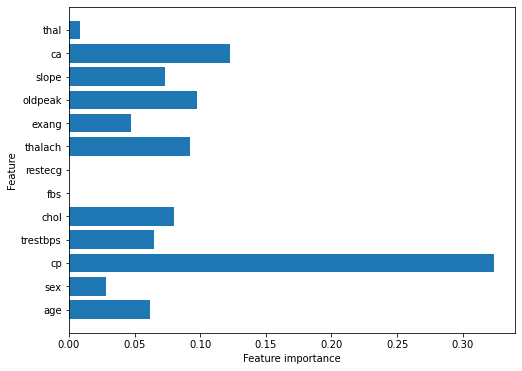

In [82]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')


In [83]:
#KNN (nearest neighbour)

In [84]:
sc=StandardScaler().fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [85]:
x_test_std

array([[ 0.18111199, -1.35154233, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132],
       [ 0.39865161,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [ 1.05127045,  0.73989544,  0.97963397, ..., -0.6067969 ,
        -0.67157686,  1.22676132],
       ...,
       [ 0.2898818 ,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [-0.25396724,  0.73989544,  0.00459922, ...,  0.98136289,
        -0.67157686, -0.41927286],
       [ 0.61619122,  0.73989544, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132]])

In [86]:
x_train_std

array([[-0.14519743, -1.35154233, -0.97043553, ...,  0.98136289,
        -0.67157686, -0.41927286],
       [-0.68904647,  0.73989544,  0.00459922, ..., -2.1949567 ,
        -0.67157686,  1.22676132],
       [ 0.18111199, -1.35154233, -0.97043553, ..., -2.1949567 ,
         1.33369489,  1.22676132],
       ...,
       [-0.47150685, -1.35154233,  0.97963397, ..., -0.6067969 ,
        -0.67157686, -0.41927286],
       [-2.21182377, -1.35154233,  0.00459922, ...,  0.98136289,
        -0.67157686, -0.41927286],
       [ 1.26881006,  0.73989544, -0.97043553, ...,  0.98136289,
         0.33105902, -0.41927286]])

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_std,y_train)

KNeighborsClassifier(n_neighbors=4)

In [90]:
prediction_knn=knn.predict(x_test_std)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [91]:
accuracy_knn

84.61538461538461

In [93]:
print("Accuracy on training set: {:.3f}".format(knn.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(x_test, y_test)))


Accuracy on training set: 0.373
Accuracy on test set: 0.516


In [97]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std,y_train)
    prediction_knn=knn.predict(x_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))



In [98]:
scores

{1: 0.7692307692307693,
 2: 0.8241758241758241,
 3: 0.8241758241758241,
 4: 0.8461538461538461,
 5: 0.8131868131868132,
 6: 0.8131868131868132,
 7: 0.8131868131868132,
 8: 0.8351648351648352,
 9: 0.7802197802197802,
 10: 0.7912087912087912,
 11: 0.7912087912087912,
 12: 0.7802197802197802,
 13: 0.7912087912087912,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7912087912087912,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7692307692307693,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7802197802197802,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

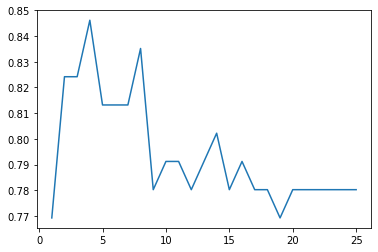

In [99]:
plt.plot(k_range,scores_list)



In [100]:
px.line(x=k_range,y=scores_list)

In [101]:
x_knn=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
x_knn_std=sc.transform(x_knn)
x_knn_prediction=dt.predict(x_knn)


In [102]:
x_knn_prediction

array([1])

In [103]:
x_knn_std

array([[ 0.94250064,  0.73989544,  1.95466871,  0.75961822, -0.30064937,
         2.37170825, -0.9841849 ,  0.01848325, -0.6723502 ,  1.10653103,
        -2.1949567 , -0.67157686, -2.06530703]])

In [104]:
(x_knn_prediction[0])

1

In [105]:
print(Category[int(x_knn_prediction[0])])

Yes, you have heart disease...RIP in Advance


In [106]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]


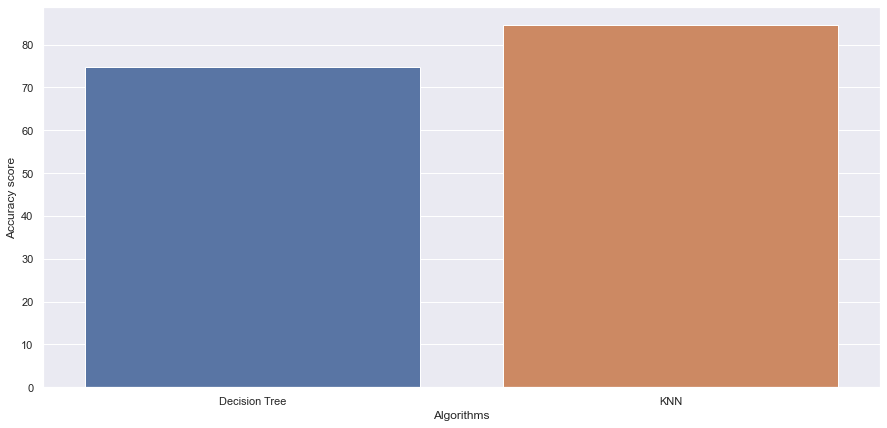

In [108]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)
